In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stocks = pd.read_csv("data/cdr.csv")
stocks["Date"] = pd.to_datetime(stocks["<DATE>"], format='%Y%m%d')
stocks = stocks[["Date", "<CLOSE>"]].rename(columns={'<CLOSE>': 'Value'})

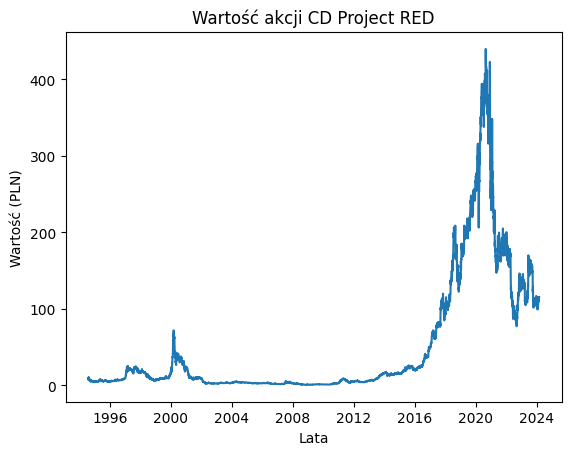

In [91]:
plt.plot(stocks["Date"].values, stocks["Value"].values)
plt.title("Wartość akcji CD Project RED")
plt.xlabel("Lata")
plt.ylabel("Wartość (PLN)")
plt.show()

In [92]:
def calculateEMA(input: list) -> int:
    n = len(input) - 1
    alpha = 2 / (n + 1)

    s = 0
    d = 0
    for i in range(n + 1):
        el = ((1 - alpha) ** i)
        s += input[n - i] * el
        d += el
    return s / d

stocks['MACD'] = np.nan
for w in stocks[["Date", "Value"]].rolling(window=26):
    if w.size != 2 * 26:
        continue
    macd = calculateEMA(w["Value"].to_list()) - calculateEMA(w["Value"].tail(12).to_list())
    stocks.iat[w.index[-1], 2] = macd

In [93]:
stocks['SIGNAL'] = np.nan
for w in stocks[["Date", "MACD"]].rolling(window=9):
    if w.size != 2 * 9:
        continue
    if pd.isna(w["MACD"].iloc[0]):
        continue
    signal = calculateEMA(w["MACD"].tail(9).to_list())
    stocks.iat[w.index[-1], 3] = signal

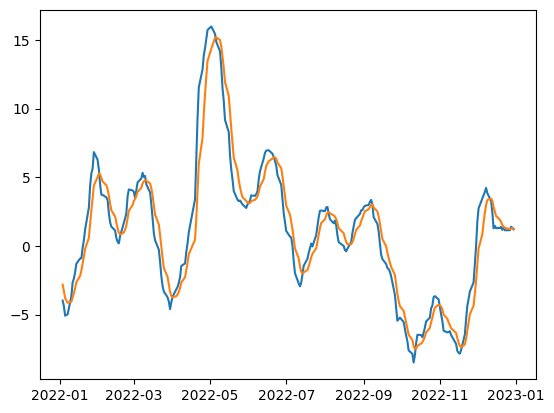

In [95]:
stocks = stocks.dropna()[(stocks['Date'] > '2022-01-01') & (stocks['Date'] < '2023-01-01')]

plt.plot(stocks["Date"].values, stocks["MACD"].values)
plt.plot(stocks["Date"].values, stocks["SIGNAL"].values)
plt.show()